# 4.8.1-4.8.5
### Что такое underfitting (недообучение)?
Проблема, при которой модель слишком сложная и выучивает данные.
Проблема, при которой модель получила недостаточно данных для обучения.

### Что такое overfitting (переобучение)?
Проблема, при которой модель слишком сложная и выучивает данные верно

### Как можно обнаружить переобучение?
Значение функции ошибки на валидации будет стабильно ниже, чем на обучении

### Какие есть способы избавиться от переобучения?
Добавление данных,Уменьшение сложности модели

### Какие есть способы избавиться от недообучения?
Усложнение модели, Ослабевание параметров регуляризации

# 4.8.6-4.8.9
### Допустим, вы обучаете модель с деревьями (например, DecisionTreeClassifier) и видите недообучение. Что нужно делать с глубиной деревьев?

Уменьшать глубину

### Во время обучения DecisionTreeClassifier вы поняли, что данные не сбалансированы. Имеет ли в данном случае значение метрика, если вы хотите недопустить переобучение, и если да, то какую метрику лучше использовать?

Имеет значение, лучше использовать f1 score

### Часто мы считаем, что данные несбалансированны, если соотношение классов в задаче бинарной классификации равно 10 к 1 или больше. У вас есть выборка, в которой соотношение классов подходит под нижний порог критерия несбалансированности. При этом, у вас в выборке 1460 записей. Сколько при этом в выборке записей класса-меньшинства? Ответ округлите вверх, если это необходимо.

133

### Вы обучали модель и поняли, что она переобучилась. Параметр C в модели обратно пропорционально отвечает за регуляризацию и в данный момент равен 1.. Вы решили изменить параметр C на 0.1, чтобы избавиться от переобучения. Чему будет равен параметр C?

0.9

# 4.9

In [3]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

titanic = pd.read_csv('titanic.csv')
titanic.head()

sex_dummies = pd.get_dummies(titanic['Sex'])
titanic = titanic.drop('Sex', axis=1).join(sex_dummies)

titanic = titanic.drop('Name', axis=1)

X, y = titanic.iloc[:, 1:], titanic.iloc[:, 0]

C:\Users\111\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


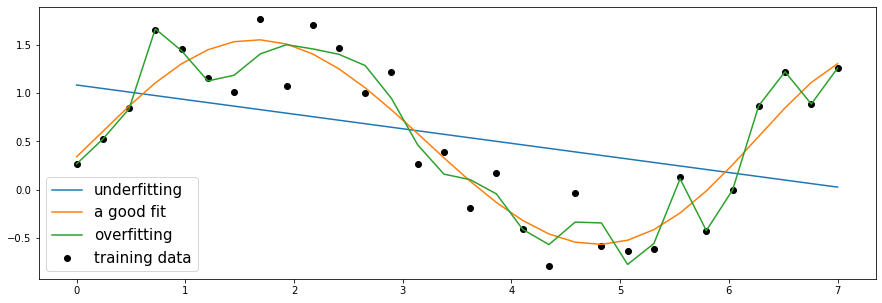

In [4]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

n_points = 30
x = np.linspace(0., 7., n_points)
y = np.sin(x) + np.random.rand(n_points)

plt.figure(figsize=(15, 5))
plt.scatter(x, y, color='k', label='training data')

for degree, label in zip([1, 5, 30], ['underfitting', 'a good fit', 'overfitting']):
    polynomial_coef = np.polyfit(x, y, deg=degree)
    inter_poly = np.polynomial.Polynomial(polynomial_coef[::-1])
    plt.plot(x, inter_poly(x), label=label)
plt.legend(fontsize=15)

In [5]:
from sklearn.tree import DecisionTreeClassifier


# 4.9.1

### Загрузите данные train.csv, оставьте в данных только признаки 'fine_amount', 'state_fee',  'late_fee', 'discount_amount', 'balance_due', 'compliance', затем избавьтесь от пропусков. Целевой переменной будет 'compliance', разделите данные на обучающую и тестовую выборки в соотношении 70%/30% без перемешивания. Обучите DecisionTreeClassifier из scikit-learn с параметром random_state=23. Посчитайте значения метрики $F1$ на тренировочной выборке и на тестовой выборке. Вычтите из значения метрики на тренировочной выборки значение метрики на тестовой выборке и запишите результат в переменную result.

0.080553414

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)


In [11]:
vis_data=vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance']].dropna()
X, y = vis_data.iloc[:, :-1], vis_data.iloc[:, -1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=123)
clf = DecisionTreeClassifier(random_state=23)
clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
train = f1_score(y_train,y_pred_train)
y_pred_valid = clf.predict(X_valid)
valid = f1_score(y_valid,y_pred_valid)
result = train - valid


In [12]:

print(result)

0.08055341409051786


# 4.9.2

### Какой эффект вы обнаружили после обучения?
Переобучение

# 4.9.3

### Если бы вам нужно было бы приблизить функцию синуса полиномом, полином какой степени подошёл бы лучше?

1